<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Get-Data" data-toc-modified-id="Get-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Visuals" data-toc-modified-id="Visuals-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visuals</a></span></li></ul></li><li><span><a href="#Data-Split:-Train-/-Test" data-toc-modified-id="Data-Split:-Train-/-Test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Split: Train / Test</a></span></li><li><span><a href="#Prepare-the-data" data-toc-modified-id="Prepare-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prepare the data</a></span><ul class="toc-item"><li><span><a href="#LabelEncoder" data-toc-modified-id="LabelEncoder-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>LabelEncoder</a></span></li><li><span><a href="#StandardScaler" data-toc-modified-id="StandardScaler-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>StandardScaler</a></span></li><li><span><a href="#Principal-Component-Analysis-(PCA)" data-toc-modified-id="Principal-Component-Analysis-(PCA)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Principal Component Analysis (PCA)</a></span></li></ul></li><li><span><a href="#Kmeans-Cluster-Model" data-toc-modified-id="Kmeans-Cluster-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Kmeans Cluster Model</a></span></li><li><span><a href="#Pipeline" data-toc-modified-id="Pipeline-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Pipeline</a></span></li><li><span><a href="#Assign-Labels" data-toc-modified-id="Assign-Labels-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Assign Labels</a></span></li><li><span><a href="#Optimal-K" data-toc-modified-id="Optimal-K-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Optimal K</a></span><ul class="toc-item"><li><span><a href="#Centriods" data-toc-modified-id="Centriods-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Centriods</a></span></li><li><span><a href="#Centriod-Visuals" data-toc-modified-id="Centriod-Visuals-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Centriod Visuals</a></span></li><li><span><a href="#Interia" data-toc-modified-id="Interia-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Interia</a></span></li><li><span><a href="#Interia2" data-toc-modified-id="Interia2-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Interia2</a></span></li><li><span><a href="#Silhouette" data-toc-modified-id="Silhouette-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Silhouette</a></span></li></ul></li><li><span><a href="#Validate-with-New-dataset" data-toc-modified-id="Validate-with-New-dataset-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Validate with New dataset</a></span></li><li><span><a href="#Conclusion-!" data-toc-modified-id="Conclusion-!-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Conclusion !</a></span></li></ul></div>

In [12]:
# Eaton Center !
Image(url='https://i.gifer.com/QE7.gif')

* Problem Statement: To analyze and segment the customer of the mall based on the attributes - age, gender, annual income and spending score. Thereby, support the Mall's marketing startegy in identifying the target customers. 


* To decompose above requirement, 
        * Whats the optimal customers segment to create? how?
        * Who are the target customers?
        * Can this customer segmentation tested with new data? 
          
* Solution Steps:
    
       Exploratory analysis:
       * Check for nulls and duplicate records. 
       * Drop unwanted columns
       * Rename the columns.
       * Visualze the data distribution patterns of categorical and numerical attributes.
       * Check for linear relationship of the data 
       * Check for Outliners
       
       Data Split - Train/Test:
       * Split the customer dataset into train and test in ratios of 80:20 respectively.   
        
       Prepare Data:
       * Convert the categorical attribute ('gender') into numerical.  
       * Remove less-informative "noise" features using PCA
       * Identify the instrinsic dimensions with significant variance.
       
       Model- Kmeans:
       * Fit Kmeans model
       
       Pipeline:
       * Run Pipeline on train_X
       * Identify and visualize the optimal clusters using Interia and Silhouette 
       * Label the segments
        
       Model Validation:
       * Validate the model with test(new)dataset
       * Predict the labels. 

## Import

In [3]:
#DataFrames
import numpy as np
import pandas as pd

#Scikit learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

#Visuals
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from pandas import plotting
import mpl_scatter_density

#Others
import random
random.seed(42)
import warnings
import os
warnings.filterwarnings("ignore")
from IPython.display import Image
import math


## Get Data

In [14]:
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [15]:
# rows, columns
df.shape

(200, 5)

## Exploratory Data Analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [18]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [19]:
# Check for Nulls
df.isnull().sum().sort_values(ascending=False)

Spending Score (1-100)    0
Annual Income (k$)        0
Age                       0
Gender                    0
CustomerID                0
dtype: int64

No null records. Its means, no additional effort required in handling nulls. Great news!

In [20]:
# Check for Nulls
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [21]:
# Unique values count
print(df.nunique())

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


'CustomerID'is primary key of the dataset and its unique counts match the total record count. Hence, no duplicate records. 

In [22]:
# drop Customer id 
df = df.drop('CustomerID', axis=1)
df.head(2)

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0   Male   19                  15                      39
1   Male   21                  15                      81

In [23]:
# rename columns
new_cols = ['Gender', 'Age', 'AnnualIncome','SpendingScore']

df.columns = new_cols

df.head(3)

Gender  Age  AnnualIncome  SpendingScore
0    Male   19            15             39
1    Male   21            15             81
2  Female   20            16              6

For easy use, I have renamed all the column names to get ride of spaces and special characters.

### Visuals

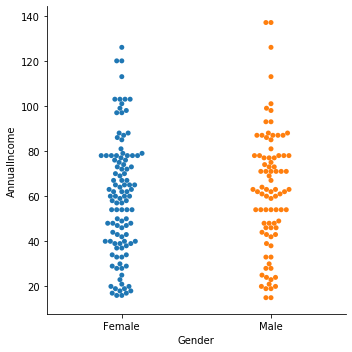

In [24]:
# Categorical Scatterplot on Gender Vs Annual Income
sns.catplot(x="Gender", y="AnnualIncome", kind="swarm",hue="Gender", data=df.sort_values("Gender"))

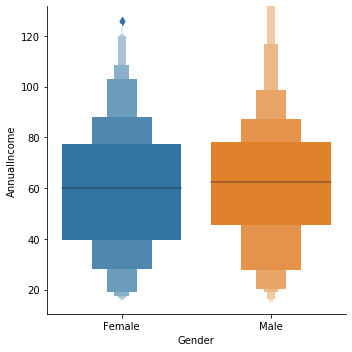

In [25]:
# Distributions of observations within categorical attribute - "Gender"
sns.catplot(x="Gender", y="AnnualIncome", kind="boxen",data=df.sort_values("Gender"))

 In the above two plots, Males get paid more than Females. But, at lower annual income level, they are paid equally. 

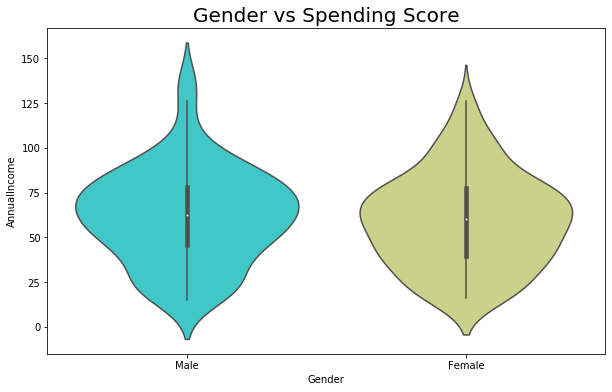

In [26]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.violinplot(df['Gender'], df['AnnualIncome'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.

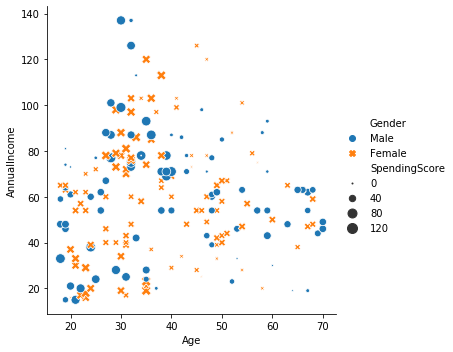

In [27]:
sns.relplot(x="Age", y="AnnualIncome", hue="Gender", style="Gender",size="SpendingScore",sizes=(1, 100), data=df);

Age(30-40 yrs) has more as well high spending score. Especially, Male are spending more than Females in this category.

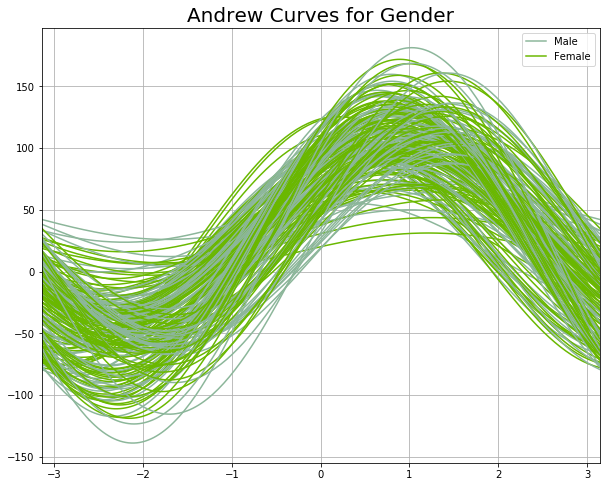

In [16]:
# Andrew Curves

plt.rcParams['figure.figsize'] = (10, 8)

plotting.andrews_curves(df, "Gender", colormap=None)
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

It has been shown the Andrews curves are able to preserve means, distance (up to a constant) and variances. Which means that Andrews curves that are represented by functions close together suggest that the corresponding data points will also be close together.

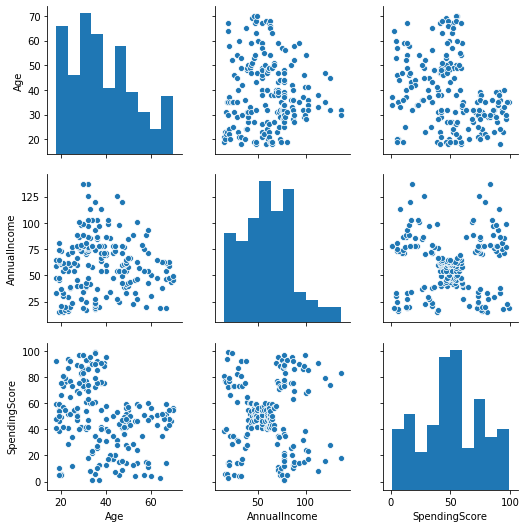

In [17]:
# Data distribution 
sns.pairplot(df);

Here, In the above Plots we can see the Distribution pattern of Annual Income and Age,we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 25-90 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

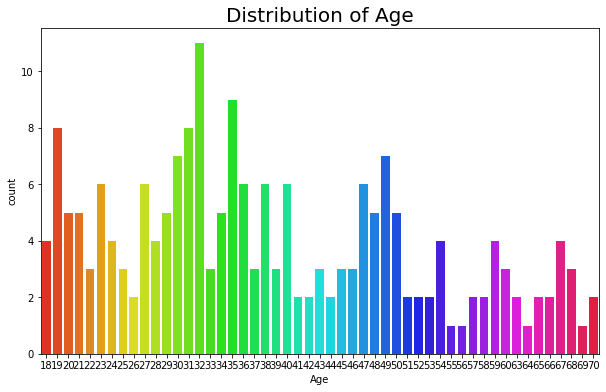

In [18]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

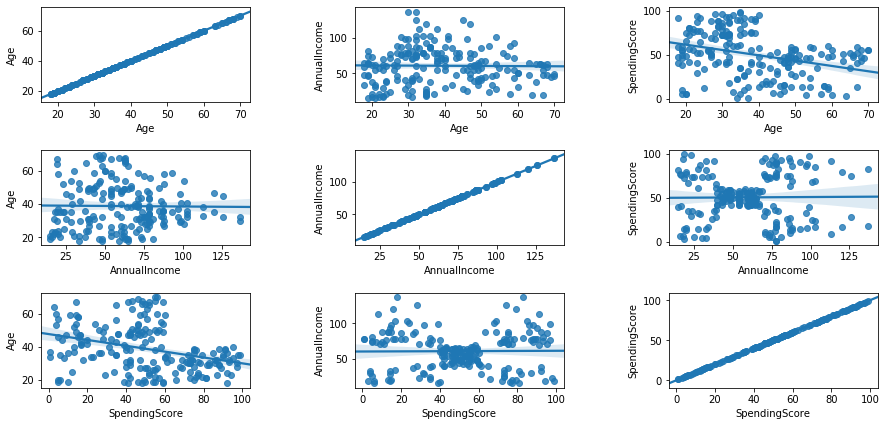

In [19]:
# Visual linear relationship
plt.figure(1 , figsize = (15 , 7))
n=0
new_cols = ['Age', 'AnnualIncome','SpendingScore']

for x in new_cols:
    for y in new_cols:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
            
plt.show()

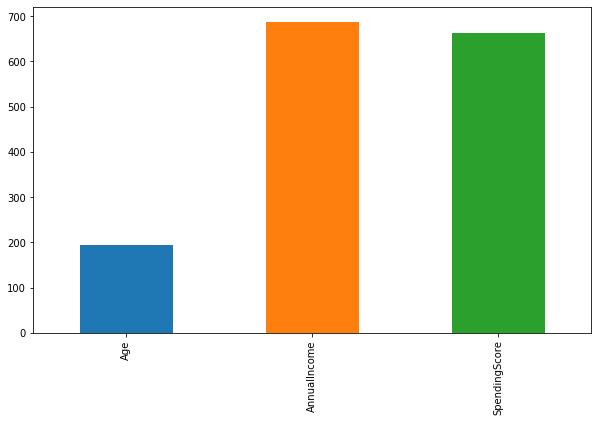

In [20]:
# lets calculate the variance of each numerical attribute in the dataset.
df.var(ddof=0).plot(kind='bar')

In [21]:
# lets calculate the SD of each numerical attribute in the dataset.
df.std(ddof=0)

Age              13.934041
AnnualIncome     26.198977
SpendingScore    25.758882
dtype: float64

## Data Split: Train / Test

In [109]:
train_X, test_X = train_test_split(df, test_size=0.2, random_state=42)

print(len(train_X), "train +", len(test_X), "test")

160 train + 40 test


In [110]:
# lets take copy of the data 
df2 = train_X.copy()

In [111]:
train_X.head(3)

Gender  Age  AnnualIncome  SpendingScore
79   Female   49            54             42
197    Male   32           126             74
38   Female   36            37             26

## Prepare the data

The following stages are:
    1. Preprocessing.LabelEncoder() - helps normalize labels such that they contain only values between 0 and n_classes-1.
    2. Principal Component analysis(PCA)- is an unsupervised statistical technique that is used for dimensionality reduction.
    3. StandardScaler - scaling to unit variance (ie Normalizing the data)
    4. Finally, Feature selection.

### LabelEncoder

In [112]:
# Let fit and transform the Gender attribute into numeric
le = LabelEncoder()
le.fit(df2.Gender)

LabelEncoder()

In [113]:
# 0 is Female, 1 is Male
le.classes_

array(['Female', 'Male'], dtype=object)

In [114]:
#update df2 with transformed values of gender
df2.loc[:,'Gender'] = le.transform(df2.Gender)

In [115]:
df2.head(3)

Gender  Age  AnnualIncome  SpendingScore
79        0   49            54             42
197       1   32           126             74
38        0   36            37             26

### StandardScaler

In [116]:
# Create scaler: scaler
scaler = StandardScaler()
scaler.fit(df2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [117]:
# transform
data_scaled = scaler.transform(df2)
data_scaled[0:3]

array([[-0.87077078,  0.73027906, -0.24190423, -0.37113766],
       [ 1.14840785, -0.50042667,  2.39455436,  0.84383985],
       [-0.87077078, -0.21084885, -0.8644014 , -0.97862642]])

The next step, PCA is sensitive to the scale of features. Hence, I have normalized the data.

### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First step "decorrelation" and then reduces dimension. 

In [118]:
pca = PCA()

# fit PCA
pca.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [119]:
# PCA features
features = range(pca.n_components_)
features

range(0, 4)

In [120]:
# PCA transformed data
data_pca = pca.transform(data_scaled)
data_pca.shape

(160, 4)

In [121]:
pca.explained_variance_ratio_

array([0.33107688, 0.26720006, 0.22991261, 0.17181045])

This tells you that 33.2% of the dataset’s variance lies along the first axis, and 26.7% lies along the second axis. I assume, 2 Intrinsic dimensions (number of PCA features needed to approximate the dataset) is sufficient to represent dataset in flat 2-dimensional plane.

In [122]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1
d

4

In [ ]:
np.sum(pca.explained_variance_ratio_)

In [ ]:
#reduced and recovered are not same

pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)


In [123]:
def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    return (important_features)

In [124]:
feature_variance = get_important_features(data_pca, pca.components_, df2.columns.values)
feature_variance

[(2.0293730959259144, 'SpendingScore'),
 (2.011445865628808, 'Age'),
 (1.975025181461185, 'Gender'),
 (1.9410591385003124, 'AnnualIncome')]

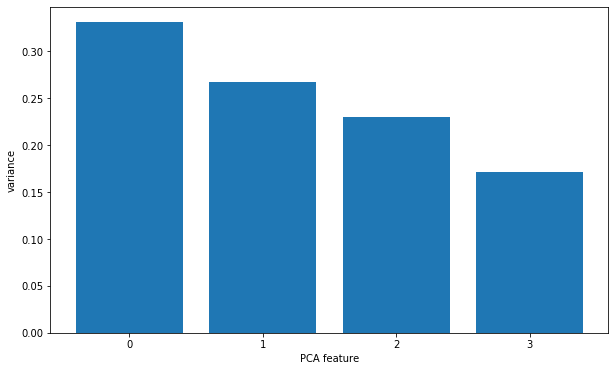

In [155]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [126]:
components = pd.DataFrame(pca.components_, columns = df2.columns, index=['PC-1', 'PC-2','PC-3','PC-4'])
components

Gender       Age  AnnualIncome  SpendingScore
PC-1  0.089750  0.689741     -0.165094      -0.699247
PC-2  0.719217  0.072334      0.691010       0.000514
PC-3 -0.688774  0.181810      0.697913      -0.073845
PC-4 -0.016208 -0.697115      0.090371      -0.711056

In [127]:
# Principal component analysis (PCA) and singular value decomposition (SVD) 
# PCA and SVD are closely related approaches and can be both applied to decompose any rectangular matrices.
pca2 = PCA(n_components=2, svd_solver='full')

# fit PCA
pca2.fit(data_scaled)

# PCA transformed data
data_pca2 = pca2.transform(data_scaled)
data_pca2.shape

(160, 2)

## Kmeans Cluster Model

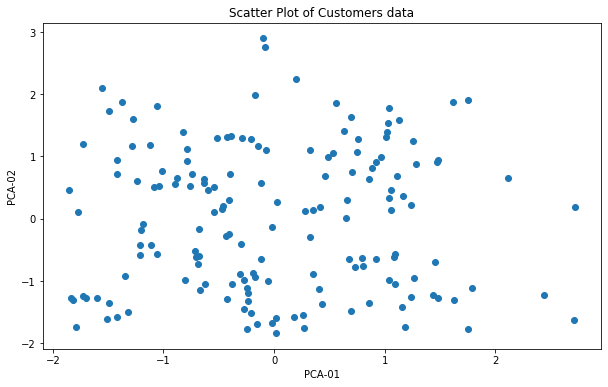

In [128]:
xs = data_pca2[:,0]
ys = data_pca2[:,1]
#zs = train_X.iloc[:,2]
plt.scatter(ys, xs)
#plt.scatter(ys, zs, c=labels)


plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

In [129]:
# KMeans model

# lets assume 4 clusters to start with

k=4 
kmeans = KMeans(n_clusters=k, init = 'k-means++',random_state = 42) 

## Pipeline

In [130]:
# Build pipeline
pipeline = make_pipeline(scaler, pca2, kmeans)
#pipeline = make_pipeline(kmeans)

In [131]:
# fit the model to the scaled dataset
model_fit = pipeline.fit(df2)
model_fit

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='full', tol=0.0,
                     whiten=False)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0))],
         verbose=False)

## Assign Labels

In [132]:
# target/labels of train_X
labels = model_fit.predict(df2)
labels

array([1, 2, 1, 1, 3, 2, 3, 3, 3, 1, 3, 2, 3, 0, 1, 1, 1, 0, 0, 1, 2, 3,
       3, 1, 3, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 3, 3, 3, 1, 0, 1, 2,
       2, 0, 3, 1, 0, 2, 1, 2, 1, 3, 3, 0, 3, 1, 3, 2, 1, 0, 3, 2, 0, 0,
       1, 1, 1, 0, 0, 3, 0, 3, 0, 2, 0, 1, 3, 1, 1, 0, 3, 0, 3, 3, 0, 3,
       0, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 3, 0, 0, 2, 3, 0, 1, 3, 0, 2, 1,
       0, 2, 1, 1, 3, 0, 2, 2, 3, 1, 3, 0, 3, 2, 1, 1, 0, 1, 0, 3, 3, 3,
       3, 0, 1, 0, 2, 3, 3, 2, 3, 3, 2, 0, 2, 2, 2, 1, 3, 0, 1, 2, 1, 0,
       1, 1, 1, 0, 2, 0])

In [154]:
# lets add the clusters to the dataset
train_X['Clusters'] = labels

In [134]:
# Number of data points for each feature in each cluster
train_X.groupby('Clusters').count()

Gender  Age  AnnualIncome  SpendingScore
Clusters                                          
0             39   39            39             39
1             44   44            44             44
2             30   30            30             30
3             47   47            47             47

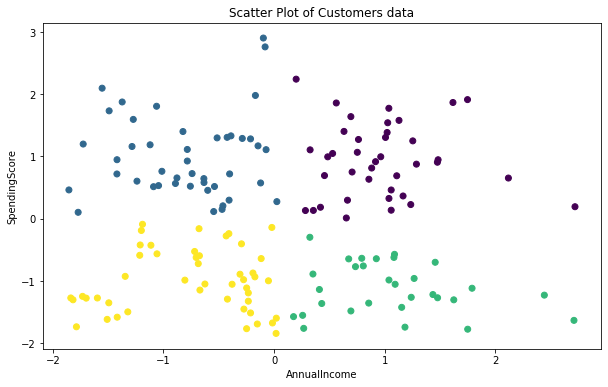

In [135]:
# Scatter plot visuals with labels

xs = data_pca2[:,0]
ys = data_pca2[:,1]
#zs = train_X.iloc[:,2]
plt.scatter(ys, xs,c=labels)
#plt.scatter(ys, zs, c=labels)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')

plt.show()

## Optimal K

### Centriods

In [136]:
# Centroids of each clusters.
centroids = model_fit[2].cluster_centers_
centroids

array([[ 0.9382679 ,  0.96757931],
       [ 1.00397723, -0.78565261],
       [-1.12404421,  1.05240565],
       [-1.00098127, -0.73912868]])

### Centriod Visuals

In [137]:
X = data_pca2
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

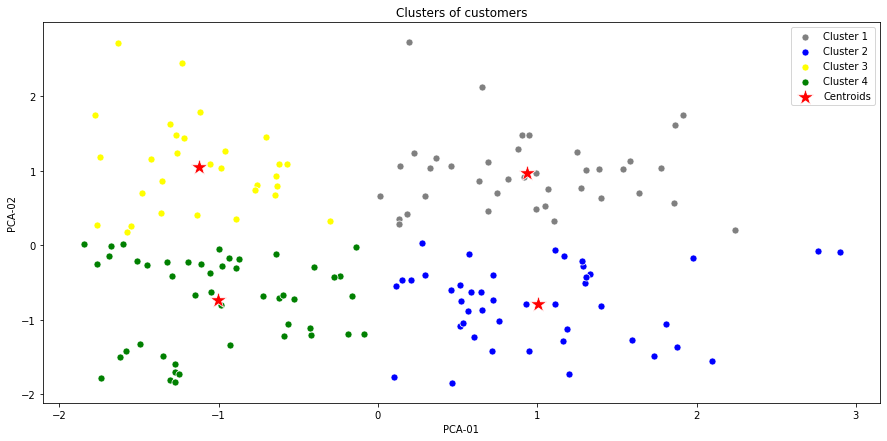

In [138]:
# Visualising the clusters & their Centriods
plt.figure(figsize=(15,7))
sns.scatterplot(X[labels == 0, 0], X[labels == 0, 1], color = 'grey', label = 'Cluster 1',s=50)
sns.scatterplot(X[labels == 1, 0], X[labels == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[labels == 2, 0], X[labels == 2, 1], color = 'yellow', label = 'Cluster 3',s=50)
sns.scatterplot(X[labels == 3, 0], X[labels == 3, 1], color = 'green', label = 'Cluster 4',s=50)
#sns.scatterplot(X[labels == 4, 0], X[labels == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(centroids_x, centroids_y, color = 'red', 
                label = 'Centroids',s=300,marker='*')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')
plt.legend()
plt.show()

### Interia

In [139]:
# Distance from each sample to centroid of its cluster
model_fit[2].inertia_

96.64194781062649

In [140]:
# WCSS stands for Within Cluster Sum of Squares. It should be low.

ks = range(1, 10)
wcss = []
samples = data_pca2

for i in ks:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(samples)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

Summation Distance(p,c) is the sum of distance of points in a cluster from the centroid.


![](https://i.imgur.com/5W63xul.png)

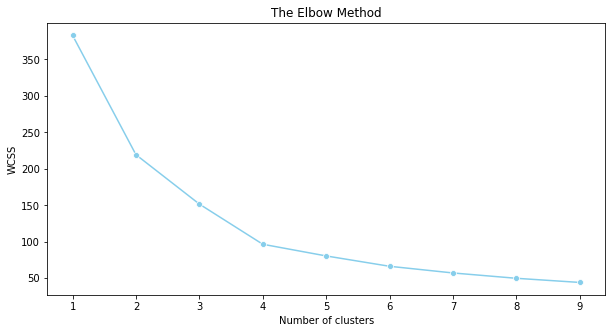

In [141]:
# lets visualize 
plt.figure(figsize=(10,5))
sns.lineplot(ks, wcss,marker='o',color='skyblue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As you can see, the inertia drops very quickly as we increase k (clusters) up to 4, but then it decreases much more slowly as we keep increasing k. This curve has roughly the shape of an arm (Hence, called Elbow Method) and there is an “elbow” at k=4. But, Is it 4 or 5 the optimal  k value? 

Lets find out with other measures like, Silhouette.

### Interia2

A complementary measure of performance is to look at what below is called inertia2, which is the sum of the squares distances between each point and the 2nd closest cluster

A nice clustering solution should have small inertia, and large inertia2: that means:

- points are close to the center of their cluster
- points are far from the center of the other clusters (since they are far to the closest center of the other clusters)

In [142]:
def getInertia2(X,kmeans):
    ''' This function is analogous to getInertia, but with respect to the 2nd closest center, rather than closest one'''
    inertia2 = 0
    for J in range(len(X)):
        L = min(1,len(kmeans.cluster_centers_)-1) # this is just for the case where there is only 1 cluster at all
        dist_to_center = sorted([np.linalg.norm(X[J] - z)**2 for z in kmeans.cluster_centers_])[L]
        inertia2 = inertia2 + dist_to_center
    return inertia2 

### Silhouette

Another performance measure is called _silhouette_:

The silhouette $s(x)$ for a point $x$ is defined as:

$$ s(x) = \frac{b(x)-a(x)}{\max\{a(x),b(x)\}} $$

where 

- $a(x)$ is the average distance between $x$ and the points in the cluster $x$ belongs

- $b(x)$ is the lowest average distance between $x$ and the points the clusters $x$ does not belong to

$s(x)$ is a quantity in $[-1,1]$. The silhouette score is the average silhouette score among all the points: $\frac{1}{|X|} \sum_x s(x)$

In [143]:
wcss = []
inertias_2 = []
silhouette_avgs = []

ks = range(1, 10)
samples = data_pca2

for i in ks:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(samples)
    wcss.append(kmeans.inertia_)
    inertias_2.append(getInertia2(samples,kmeans))
    if i>1:
        silhouette_avgs.append(silhouette_score(samples, kmeans.labels_))

In [144]:
silhouette_avgs

[0.3962800530341027,
 0.3744946583252696,
 0.43129470080407445,
 0.410940870860934,
 0.4123284151475085,
 0.40028157025754146,
 0.39335017036536263,
 0.3993166863367117]

The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

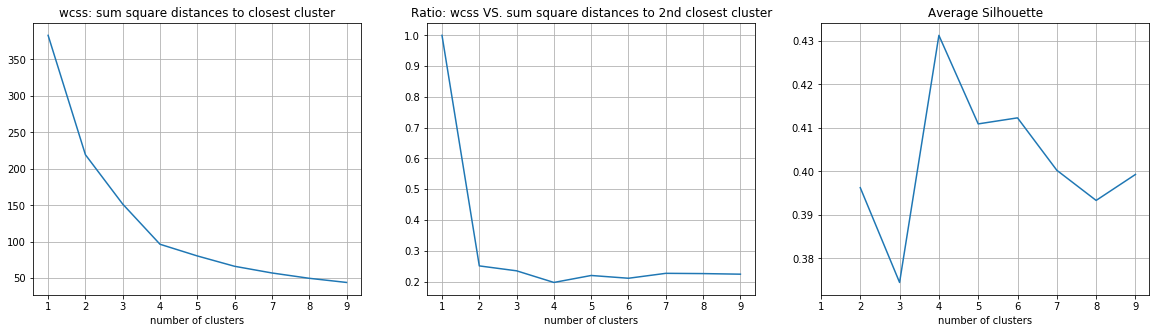

In [145]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("wcss: sum square distances to closest cluster")
plt.plot(ks,wcss)
plt.xticks(ks)
plt.xlabel('number of clusters')
plt.grid()
    
plt.subplot(1,3,2)    
plt.title("Ratio: wcss VS. sum square distances to 2nd closest cluster")
plt.plot(ks,np.array(wcss)/np.array(inertias_2))
plt.xticks(ks)
plt.xlabel('number of clusters')
plt.grid()

plt.subplot(1,3,3)  
plt.title("Average Silhouette")
plt.plot(ks[1:], silhouette_avgs)
plt.xticks(ks)
plt.xlabel('number of clusters')
plt.grid()

plt.show()

Diagram 1 is Interia (Elbow method). We are unable to infer whether 4, 5 or 6 is the optimal K value?

Diagram 2 is ratio of Interia / sum squares distance to 2nd closest cluster. Th ratio is increasing is low at K=4 which means small interia and large interia2(points far from other clusters). So. 4 is the optimal K.

Diagram 3 is the silhouette score. Highest silhouette score means means that the instance is well inside its own cluster and far from other clusters. K=4 has highest score. 

So, Optimal Clusters (K) is 4.

## Validate with New dataset 

In [146]:
# Copy the dataset
df_new = test_X.copy()

In [147]:
# predict the labels
le.fit(df_new.Gender)

#update df2 with transformed values of gender
df_new.loc[:,'Gender'] = le.transform(df_new.Gender)

labels_test = model_fit.predict(df_new)
labels_test

array([2, 3, 0, 0, 0, 3, 3, 0, 0, 3, 1, 0, 3, 3, 0, 2, 1, 1, 0, 2, 3, 1,
       1, 1, 2, 0, 3, 1, 3, 3, 3, 1, 0, 2, 0, 0, 3, 2, 0, 1])

In [148]:
# lets add the clusters to the dataset
test_X['Clusters'] = labels_test
test_X.head(3)

Gender  Age  AnnualIncome  SpendingScore  Clusters
95   Male   24            60             52         2
15   Male   22            20             79         3
30   Male   60            30              4         0

In [149]:
# Number of data points for each feature in each cluster
test_X.groupby('Clusters').count()

Gender  Age  AnnualIncome  SpendingScore
Clusters                                          
0             13   13            13             13
1              9    9             9              9
2              6    6             6              6
3             12   12            12             12

In [150]:
query = (test_X['Clusters']==1)
test_X[query]

Gender  Age  AnnualIncome  SpendingScore  Clusters
66   Female   43            48             50         1
56   Female   51            44             50         1
152  Female   44            78             20         1
16   Female   35            21             35         1
148  Female   34            78             22         1
93   Female   40            60             40         1
67   Female   68            48             48         1
18     Male   52            23             29         1
76   Female   45            54             53         1

## Conclusion !

For the given dataset, we have segmented the customers into 4 (optimal) clusters using Kmeans algorithm. Each cluster is mix of defined variables such as - gender, age, spending score and annual income.  

We have to run another machine learning model to distinguish customers. As of now, lets assume the clusters are include of following customers - Big Spenders, Bargain Hunters, Window Shoppers.

In [151]:
from IPython.display import display, HTML

HTML('''<div style="display: flex; justify-content: row;">
    <img src="https://media.giphy.com/media/MEgGD8bV72hfq/giphy.gif">
    <img src="https://media.giphy.com/media/3k9gOXgimLWF2/giphy.gif">
    <img src="https://media.giphy.com/media/3o751RE4VSNLjpSLew/giphy.gif">
</div>''')

In [152]:
# Are these shoppers? No idea! what they are doing.
Image(url='https://media.giphy.com/media/fAhOtxIzrTxyE/giphy.gif')